In [1]:
import sqlite3
import pandas as pd

In [2]:
#1

In [3]:
con = sqlite3.connect('imdb_small_index.db')
cur = con.cursor()

In [6]:
cur.execute("""
CREATE TABLE movies (
    title_id integer,
    title text,
    year integer,
    mark integer,
    PRIMARY KEY (title_id)
)
""")

OperationalError: table movies already exists

In [7]:
con.commit()

In [14]:
movies_query = """
SELECT titles.title_id, title, premiered
FROM titles
WHERE title = "Harry Potter and the Sorcerer's Stone"
    or title = "Fantastic Beasts and Where to Find Them"
    or title = "Fantastic Beasts: The Crimes of Grindelwald"
    or title = "Shrek 2"
    or title = "That Sugar Film"
    or title = "Status: Svoboden"
    or title = "Brokeback Mountain"
    or title = "Soulless 2"
    or title = "The Danish Girl"
    or title = "The Theory of Everything"
"""

cur.execute(movies_query)
movies = cur.fetchall()
movies

[(241527, "Harry Potter and the Sorcerer's Stone", 2001),
 (298148, 'Shrek 2', 2004),
 (388795, 'Brokeback Mountain', 2005),
 (810819, 'The Danish Girl', 2015),
 (2980516, 'The Theory of Everything', 2014),
 (3136646, 'Soulless 2', 2015),
 (3183660, 'Fantastic Beasts and Where to Find Them', 2016),
 (3892434, 'That Sugar Film', 2014),
 (4123430, 'Fantastic Beasts: The Crimes of Grindelwald', 2018),
 (5352802, 'Status: Svoboden', 2016)]

In [15]:
my_rating = (10, 10, 9, 9, 10, 6, 8, 9, 6, 7)

In [16]:
list_of_movies = []
for movie in movies:
    list_of_movies.append(list(movie))
print(list_of_movies)

[[241527, "Harry Potter and the Sorcerer's Stone", 2001], [298148, 'Shrek 2', 2004], [388795, 'Brokeback Mountain', 2005], [810819, 'The Danish Girl', 2015], [2980516, 'The Theory of Everything', 2014], [3136646, 'Soulless 2', 2015], [3183660, 'Fantastic Beasts and Where to Find Them', 2016], [3892434, 'That Sugar Film', 2014], [4123430, 'Fantastic Beasts: The Crimes of Grindelwald', 2018], [5352802, 'Status: Svoboden', 2016]]


In [17]:
for i in range(10):
    list_of_movies[i].append(my_rating[i])
print(list_of_movies)

[[241527, "Harry Potter and the Sorcerer's Stone", 2001, 10], [298148, 'Shrek 2', 2004, 10], [388795, 'Brokeback Mountain', 2005, 9], [810819, 'The Danish Girl', 2015, 9], [2980516, 'The Theory of Everything', 2014, 10], [3136646, 'Soulless 2', 2015, 6], [3183660, 'Fantastic Beasts and Where to Find Them', 2016, 8], [3892434, 'That Sugar Film', 2014, 9], [4123430, 'Fantastic Beasts: The Crimes of Grindelwald', 2018, 6], [5352802, 'Status: Svoboden', 2016, 7]]


In [19]:
cur.executemany("INSERT INTO movies VALUES (?, ?, ?, ?)", list_of_movies)
con.commit()

In [21]:
#2

In [22]:
#Какие фильмы выпущены позже всего? 
#LIMIT

In [23]:
latest_release_query = """
SELECT 
    title, year
FROM 
    movies 
ORDER BY year DESC
LIMIT 5
"""

In [24]:
cur.execute(latest_release_query)
cur.fetchall()

[('Fantastic Beasts: The Crimes of Grindelwald', 2018),
 ('Fantastic Beasts and Where to Find Them', 2016),
 ('Status: Svoboden', 2016),
 ('The Danish Girl', 2015),
 ('Soulless 2', 2015)]

In [ ]:
#Какие фильмы этого десятилетия мне понравились больше всего?
#WHERE

In [27]:
best_rated_this_decade = """
SELECT 
    title, year, mark
FROM 
    movies
WHERE 
    year > 2010 and mark == 10
"""

In [28]:
cur.execute(best_rated_this_decade)
cur.fetchall()

[('The Theory of Everything', 2014, 10)]

In [ ]:
#Превышает ли число недавно просмотренных мной фильмов с Эдди Редмейном или Эммой Уотсон 3 или нет?
#JOIN
#COUNT
#GROUP BY + HAVING

In [29]:
fav_actors_query = """
SELECT 
    name, COUNT(movies.title_id) as n_films
FROM movies 
    JOIN crew ON movies.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
WHERE name IN ("Emma Watson", "Eddie Redmayne")
GROUP BY name
HAVING n_films > 3
"""


In [30]:
cur.execute(fav_actors_query)
cur.fetchall()

[('Eddie Redmayne', 4)]

In [31]:
# Кто из актеров участвовал в обоих частях "Фантастических тварей"?
#GROUP_CONCAT

In [32]:
common_cast_query = """
SELECT
    title, GROUP_CONCAT(name, ', ')
FROM movies
    JOIN crew ON movies.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
    JOIN role_categories ON crew.category = role_categories.id
WHERE role_type IN ('actress','actor') AND title LIKE "Fantastic%"
GROUP BY movies.title_id
"""

In [33]:
cur.execute(common_cast_query)
cur.fetchall()

[('Fantastic Beasts and Where to Find Them',
  'Eddie Redmayne, Katherine Waterston, Alison Sudol, Dan Fogler'),
 ('Fantastic Beasts: The Crimes of Grindelwald',
  'Eddie Redmayne, Katherine Waterston, Dan Fogler, Johnny Depp')]

In [ ]:
#3

In [34]:
import matplotlib.pyplot as plt

In [35]:
#Каково распределение моих оценок относительно года релиза фильма?
#AVG

In [36]:
marks_by_year_query = """
SELECT 
    year, AVG(mark)
FROM movies
GROUP BY year
"""

In [38]:
cur.execute(marks_by_year_query)
data = cur.fetchall()

In [39]:
years = []

In [40]:
rates = []

In [41]:
for item in data:
    years.append(item[0])
    rates.append(item[1])

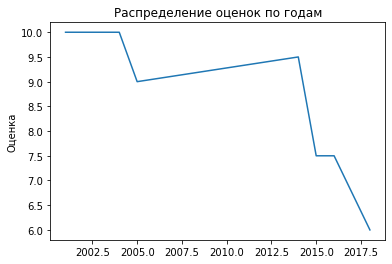

In [42]:
X = years
Y = rates
plt.plot(X, Y) 
plt.title('Распределение оценок по годам')
plt.ylabel('Оценка')
plt.show()

In [ ]:
#4

In [44]:
#картинка в репо

In [ ]:
#К таблице titles нужно присоединить таблицу rating, a к полученной -- предварительно созданную таблицу voters,
#в которой может храниться информация об оценке пользователя(rate), 
#его возрасте(age), гендере(gender) и указание, является ли он кинокритиком или любителем(is_critic)